In [192]:
#drop churn_risk/tenure
# do not use S3_Recode/churn_risk in modeling
# use churn risk/S3_recode for present
# convert some to numbers for certain models to work
# tree structure being robust/boosting/random forest

# age/gender split/country/favoriate channels/cables&tele?
# drop community/city/original tenure/orginal salutation/all julian dates

# try different metrics -> better than random
# for each kind of labels, how the respondents within the label look like?

# model -> how good can we do than random?
# presentation -> 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#df = pd.read_excel('probability_matrix_Partition Around Medoids_6.xlsx')
df = pd.read_excel('probability_matrix_K-Means_R40_6.xlsx')
#df = pd.read_excel('probability_matrix_K-Means_R18_6.xlsx')
data = pd.read_excel('Cleaned_MaxDiff_Model_Data.xlsx')

In [46]:
df[df['Respondent']==3]
df[df['Respondent']==104]
df[df['Respondent']==1577]

,Respondent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,cluster


In [47]:
df.groupby('cluster')['Respondent'].count()

cluster
1    1393
2     334
3      76
4     320
5     372
6     171
Name: Respondent, dtype: int64

In [48]:
Respondent_list = []
for i in range(1,2670):
    Respondent_list.append(i)

In [49]:
data['Respondent']=Respondent_list

In [50]:
respondent_ids_to_drop = [3, 104, 1577]

data = data[~data['Respondent'].isin(respondent_ids_to_drop)]

In [51]:
data[data['Respondent']==3]
data[data['Respondent']==104]
data[data['Respondent']==1577]

,Respondent,S3_Recode,Churn_risk,CommercialProductName,ConvergedStatus,DTV_TIER_OPTION_NAME,Film1,FixedVoicePlan,FoxSportEDL,FoxSportINT,...,TELEPHONY_TIER_OPTION_NAME,TVContentPack,Sport,Trimmed_Tenure,New_Salutation,PROVINCE,MDiff_CATV_INSTALLATION_DATE,MDiff_DTV_INSTALLATION_DATE,MDiff_INTERNET_INSTALLATION_DATE,MDiff_TELEPHONY_INSTALLATION_DATE


Manually figured out and changed the values of “provinces not found” in Provinces.

In [52]:
data.loc[data['PROVINCE'] == 'Frysl??n','PROVINCE'] = 'Friesland'
grouped = data.groupby(['PROVINCE'])
count_per_name = grouped.size()
print(count_per_name)

PROVINCE
Drenthe           99
Flevoland         24
Fryslân           96
Gelderland       301
Groningen         92
Limburg          331
Noord-Brabant    488
Noord-Holland    442
Overijssel       158
Utrecht          171
Zuid-Holland     464
dtype: int64


In [53]:
data.loc[data['S3_Recode'] == 'LOYAL & LIGHT RISK','S3_Recode'] = 'LIGHT RISK'
grouped = data.groupby(['S3_Recode'])
count_per_name = grouped.size()
print(count_per_name)

S3_Recode
HIGH RISK      1315
LIGHT RISK      351
MEDIUM RISK    1000
dtype: int64


In [54]:
data.loc[data['ConvergedStatus'] == 'Converged','ConvergedStatus'] = '1'
data.loc[data['ConvergedStatus'] == 'Not Converged','ConvergedStatus'] = '0'
grouped = data.groupby(['ConvergedStatus'])
count_per_name = grouped.size()
print(count_per_name)

ConvergedStatus
0    1430
1    1236
dtype: int64


In [55]:
data.loc[data['New_Salutation'] == 'Unknown','New_Salutation'] = 'Mr./Ms.'
grouped = data.groupby(['New_Salutation'])
count_per_name = grouped.size()
print(count_per_name)

New_Salutation
Mr.        1990
Mr./Ms.      84
Ms.         592
dtype: int64


In [56]:
data[['S3_Recode','Churn_risk','DTV_TIER_OPTION_NAME','CommercialProductName',
      'INTERNET_TIER_OPTION_NAME','InternetSecurityType','MediaBoxType','TVContentPack',
      'PlayLevel','TELEPHONY_TIER_OPTION_NAME','FixedVoicePlan']]

,S3_Recode,Churn_risk,DTV_TIER_OPTION_NAME,CommercialProductName,INTERNET_TIER_OPTION_NAME,InternetSecurityType,MediaBoxType,TVContentPack,PlayLevel,TELEPHONY_TIER_OPTION_NAME,FixedVoicePlan
0,MEDIUM RISK,high,Extra Channel Pack No Horizon,Internet Complete & TV Start (2P),250 / 25 MBPS,SAFE ONLINE,MEDIABOX,Extra Channel Pack,TV + INT,0,0
1,MEDIUM RISK,mid,Extra Channel Pack Horizon,Internet Complete & TV Max (2P),250 / 25 MBPS,SAFE ONLINE,MEDIABOX XL,Extra Channel Pack,TV + INT,0,0
3,LIGHT RISK,high,Standard Channel Pack No Horizon,Internet Start & TV Start (2P),50 / 5 MBPS,SAFE ONLINE XL,MEDIABOX,Standard Channel Pack,TV + INT,0,0
4,LIGHT RISK,low,Standard Channel Pack No Horizon,Internet Complete & TV Start,250 / 25 MBPS,SAFE ONLINE XL,0,Standard Channel Pack,TV + INT + TEL,Volop Bellen,Volop Bellen
5,MEDIUM RISK,low,Standard Channel Pack No Horizon,Internet Start & TV Complete Next,50 / 5 MBPS,SAFE ONLINE XL,MEDIABOX NEXT,Standard Channel Pack,TV + INT + TEL,Vast Bellen,Vast Bellen
...,...,...,...,...,...,...,...,...,...,...,...
2664,LIGHT RISK,high,Extra Channel Pack No Horizon,Internet Complete & TV Start,250 / 25 MBPS,SAFE ONLINE,MEDIABOX,Extra Channel Pack,TV + INT + TEL,Volop Bellen Internationaal,Volop Bellen Internationaal
2665,MEDIUM RISK,low,Standard Channel Pack No Horizon,Internet Start & TV Start,50 / 5 MBPS,SAFE ONLINE XL,MEDIABOX,Standard Channel Pack,TV + INT + TEL,Volop Bellen,Volop Bellen
2666,MEDIUM RISK,low,Standard Channel Pack No Horizon,Internet Complete & TV Complete Next,250 / 25 MBPS,SAFE ONLINE XL,MEDIABOX NEXT,Standard Channel Pack,TV + INT + TEL,Vast Bellen,Vast Bellen
2667,LIGHT RISK,high,Standard Channel Pack Horizon,Internet Start & TV Complete (2P),50 / 5 MBPS,SAFE ONLINE,MEDIABOX XL,Standard Channel Pack,TV + INT,0,0


In [57]:
data=data.drop(['Respondent','S3_Recode','Churn_risk','DTV_TIER_OPTION_NAME','CommercialProductName',
      'INTERNET_TIER_OPTION_NAME','InternetSecurityType','MediaBoxType','TVContentPack',
      'PlayLevel','TELEPHONY_TIER_OPTION_NAME','FixedVoicePlan'], axis=1)

In [58]:
data

,ConvergedStatus,Film1,FoxSportEDL,FoxSportINT,HasCATV,HasDTV,HasINT,HasTEL,IntSecurity_Benefit,Kids_Benefit,...,MoviesSeriesXL,MSL_Benefit,Sport,Trimmed_Tenure,New_Salutation,PROVINCE,MDiff_CATV_INSTALLATION_DATE,MDiff_DTV_INSTALLATION_DATE,MDiff_INTERNET_INSTALLATION_DATE,MDiff_TELEPHONY_INSTALLATION_DATE
0,0,0,0,0,1,1,1,0,0,0,...,1,0,0,0.789,Mr.,Utrecht,42,43,43,1488
1,0,0,0,0,1,1,1,0,0,0,...,1,0,0,7.210,Ms.,Noord-Brabant,120,120,120,120
3,1,0,0,0,1,1,1,0,1,0,...,0,1,0,2.846,Mr.,Limburg,67,68,68,1488
4,1,0,0,0,1,1,1,1,1,0,...,0,1,0,4.369,Mr.,Limburg,86,86,86,86
5,1,0,1,0,1,1,1,1,1,0,...,0,0,1,6.517,Mr.,Limburg,112,112,112,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,0,0,0,0,1,1,1,1,0,0,...,1,0,0,4.356,Mr./Ms.,Gelderland,86,86,86,86
2665,1,0,0,0,1,1,1,1,1,0,...,0,1,0,1.117,Mr.,Noord-Brabant,167,167,167,167
2666,1,0,0,0,1,1,1,1,1,0,...,0,0,1,1.103,Mr.,Limburg,166,166,166,166
2667,0,0,0,0,1,1,1,0,0,0,...,0,0,0,4.621,Mr.,Noord-Brabant,89,88,88,1488


In [59]:
data.columns

Index(['ConvergedStatus', 'Film1', 'FoxSportEDL', 'FoxSportINT', 'HasCATV',
       'HasDTV', 'HasINT', 'HasTEL', 'IntSecurity_Benefit', 'Kids_Benefit',
       'MoviesSeriesL', 'MoviesSeriesStd', 'MoviesSeriesXL', 'MSL_Benefit',
       'Sport', 'Trimmed_Tenure', 'New_Salutation', 'PROVINCE',
       'MDiff_CATV_INSTALLATION_DATE', 'MDiff_DTV_INSTALLATION_DATE',
       'MDiff_INTERNET_INSTALLATION_DATE',
       'MDiff_TELEPHONY_INSTALLATION_DATE'],
      dtype='object')

In [60]:
df = df['cluster']

In [61]:
df

0       3
1       1
2       1
3       1
4       5
       ..
2661    5
2662    1
2663    1
2664    6
2665    1
Name: cluster, Length: 2666, dtype: int64

In [62]:
data.isna().sum(axis=1).sum()

5

In [63]:
data[data.isna().any(axis=1)]['Trimmed_Tenure']

276    NaN
1320   NaN
1544   NaN
2101   NaN
2316   NaN
Name: Trimmed_Tenure, dtype: float64

In [64]:
data['Trimmed_Tenure'] = data['Trimmed_Tenure'].fillna(0)

In [65]:
data[data.isna().any(axis=1)]['Trimmed_Tenure']

Series([], Name: Trimmed_Tenure, dtype: float64)

In [66]:
data.isna().sum(axis=1).sum()

0

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from xgboost import XGBClassifier
import warnings

In [68]:
#LabelEncoder
label = data.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in label:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [69]:
data.shape

(2666, 22)

In [70]:
#RandomForestClassifier
X = data
y = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=1000,random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.45875

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score

# use weighted for multi-class classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
print("Metrics using K-Means 40th Iteration")
print("Accuracy: " + "{:.3f}".format(accuracy) + "  Precision: " + "{:.3f}".format(precision))
print("Recall: " + "{:.3f}".format(recall) + "    F1: " + "{:.3f}".format(f1))

Metrics using K-Means 40th Iteration
Accuracy: 0.459  Precision: 0.359
Recall: 0.459    F1: 0.393


In [72]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm) 
# accuracy per segment
# what problem is
# reduce churn
# data manipulation/data matrix - quickly go over
# gender split/demographics/S3 Recode for churn/ - visualization
# preferences for each segment - visualization/tell story
# do better than randomness per segment

# next step? survey a bit more to new customers/test the db 
# reasons why we use segmentation: we don't talk to every single person enough; 
# so clustering people together to find some similarities -> target people without too much information

Confusion matrix

 [[342  27   4  23  30   6]
 [ 73   9   1   2   8   2]
 [ 14   1   0   1   4   1]
 [ 70   9   0   5  12   1]
 [ 82   8   2   6  10   2]
 [ 36   2   0   1   5   1]]


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.55      0.79      0.65       432
           2       0.16      0.09      0.12        95
           3       0.00      0.00      0.00        21
           4       0.13      0.05      0.07        97
           5       0.14      0.09      0.11       110
           6       0.08      0.02      0.03        45

    accuracy                           0.46       800
   macro avg       0.18      0.18      0.17       800
weighted avg       0.36      0.46      0.39       800



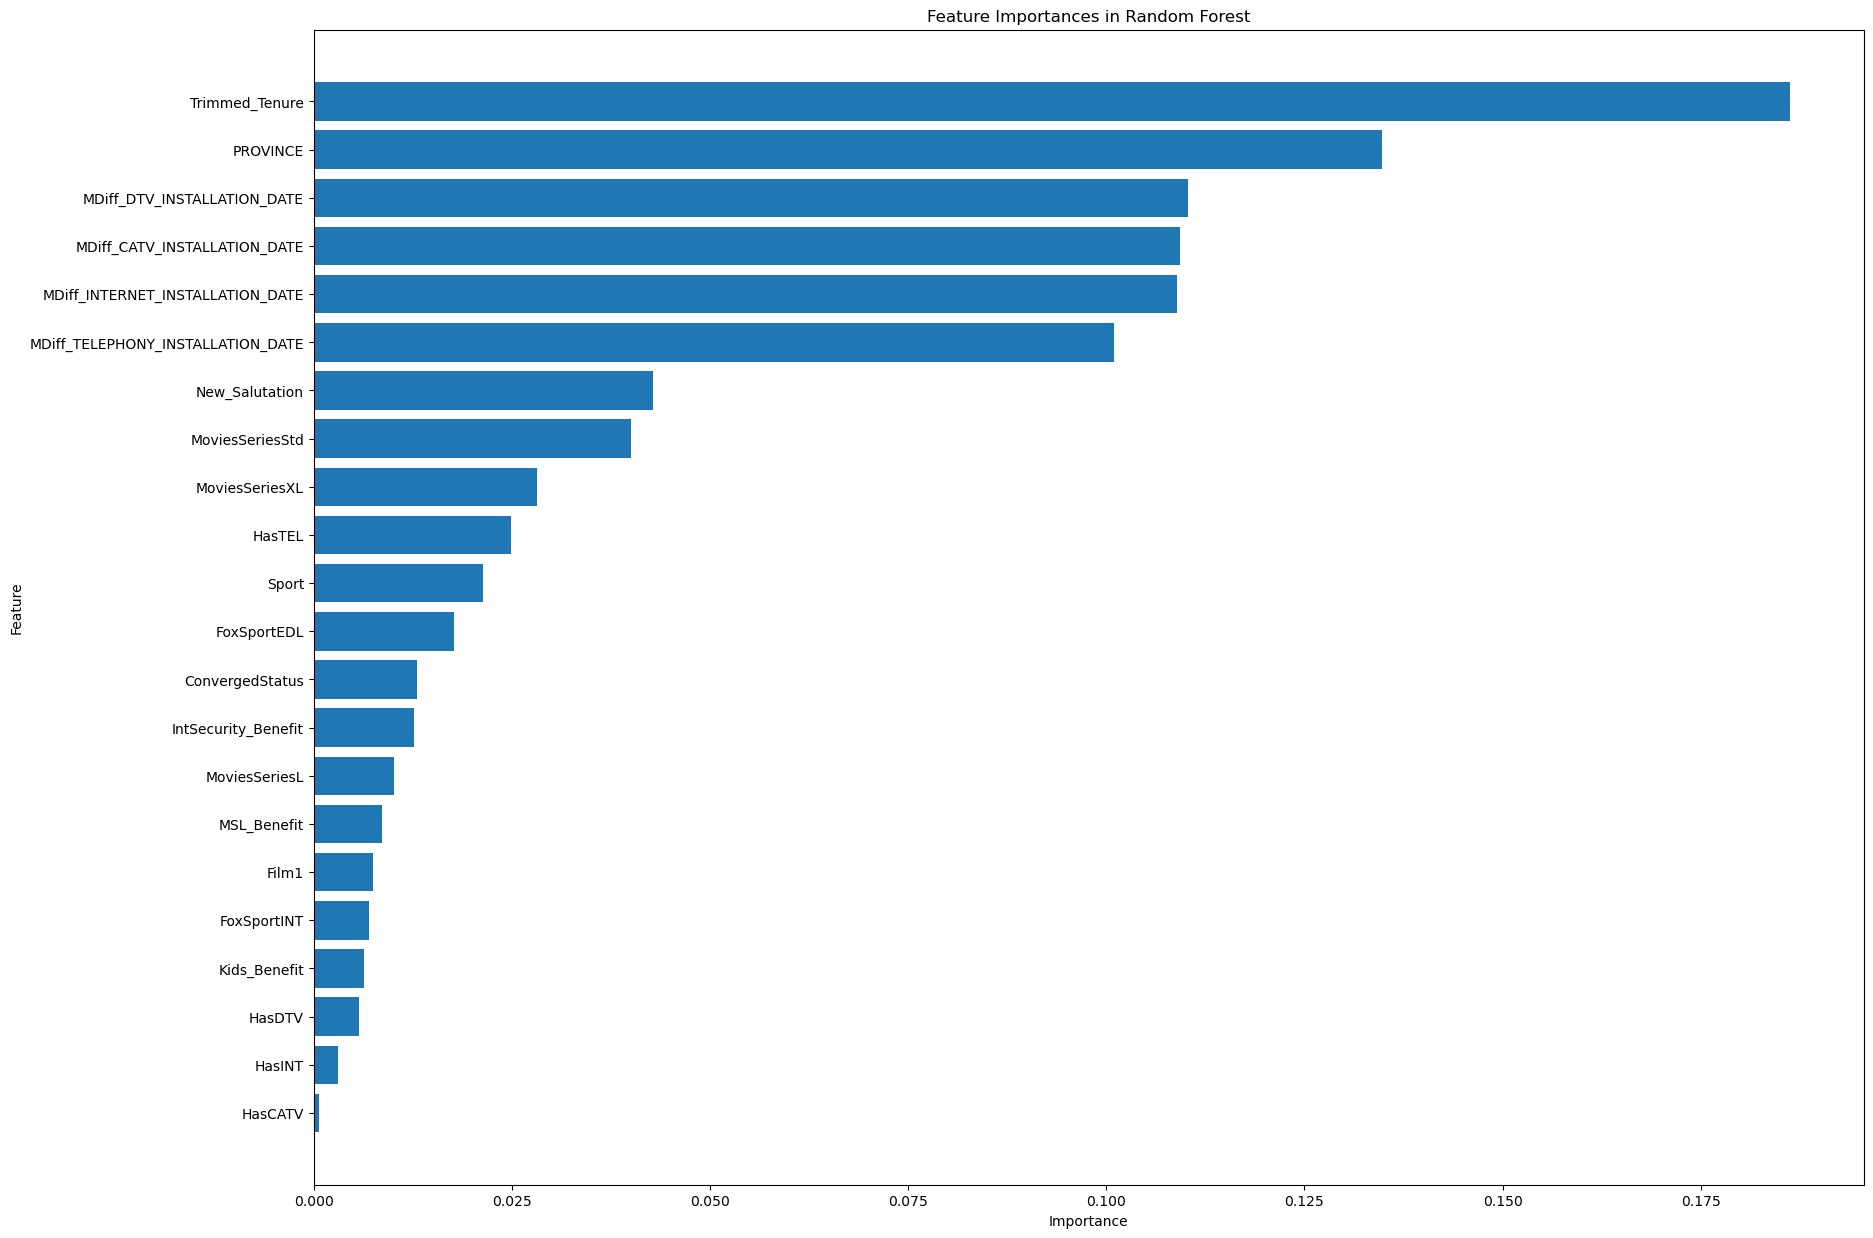

In [74]:
#feature_importances
feature_importances = rf.feature_importances_
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features= features.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 15))  
plt.barh(features['Feature'], features['Importance'])  
plt.xlabel('Importance')  
plt.ylabel('Feature')  
plt.title('Feature Importances in Random Forest')  
plt.gca().invert_yaxis()  
plt.show() # drop the last five to see if improving better

In [42]:
# top16 RandomForestClassifier
#features=features.head(17) 
top_features = features.head(13)['Feature'].values
#top_features = features['Feature'].values
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

rf_top = RandomForestClassifier(n_estimators=1000,random_state=42)
rf_top.fit(X_train_top, y_train)

y_pred_top = rf_top.predict(X_test_top)
accuracy_top = accuracy_score(y_test, y_pred_top)


accuracy_top

0.4625

In [511]:
features_val = features['Feature'].values

Text(0.5, 1.0, 'Random Forest using KM_R40')

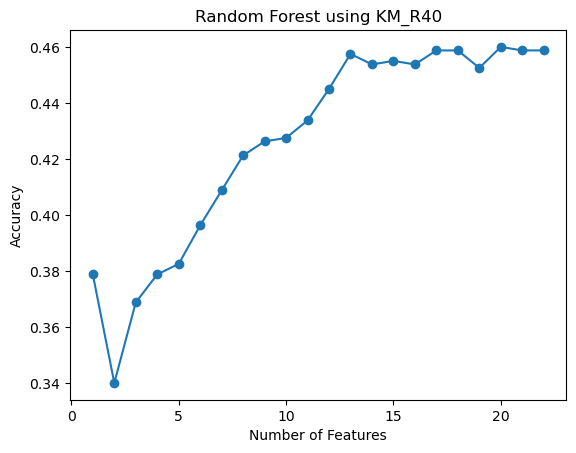

In [76]:
warnings.filterwarnings("ignore")

features_val = features['Feature'].values
accuracies = []

for num_features in range(1, len(features_val) + 1):
    current_features = features_val[:num_features]
    X_train_top = X_train[current_features]
    X_test_top = X_test[current_features]

    rf_top = RandomForestClassifier(n_estimators=1000, random_state=42)
    rf_top.fit(X_train_top, y_train)

    y_pred_top = rf_top.predict(X_test_top)
    accuracy_top = accuracy_score(y_test, y_pred_top)
    accuracies.append(accuracy_top)

# Plotting the results
plt.plot(range(1, len(features_val) + 1), accuracies, marker='o')
# Adding axis labels
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Random Forest using KM_R40')
#plt.xlabel

In [392]:
features

,Feature,Importance
15,Trimmed_Tenure,0.188177
17,PROVINCE,0.137375
20,MDiff_INTERNET_INSTALLATION_DATE,0.108951
19,MDiff_DTV_INSTALLATION_DATE,0.106308
18,MDiff_CATV_INSTALLATION_DATE,0.106126
21,MDiff_TELEPHONY_INSTALLATION_DATE,0.095908
11,MoviesSeriesStd,0.043559
16,New_Salutation,0.041885
12,MoviesSeriesXL,0.027187
7,HasTEL,0.023801


In [322]:
data = data.drop(['MoviesSeriesL','MSL_Benefit','Film1','FoxSportINT',
                  'Kids_Benefit','HasDTV','HasINT','HasCATV'],
                axis=1)

In [272]:
#LabelEncoder
label = data.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in label:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
data.shape

(2666, 14)

In [273]:
#RandomForestClassifier
X = data
y = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


0.4625

In [35]:
print("The accuracy with data using K-Means 40th iteration algorithm is " + str(accuracy))

The accuracy with data using K-Means 40th iteration algorithm is 0.46625


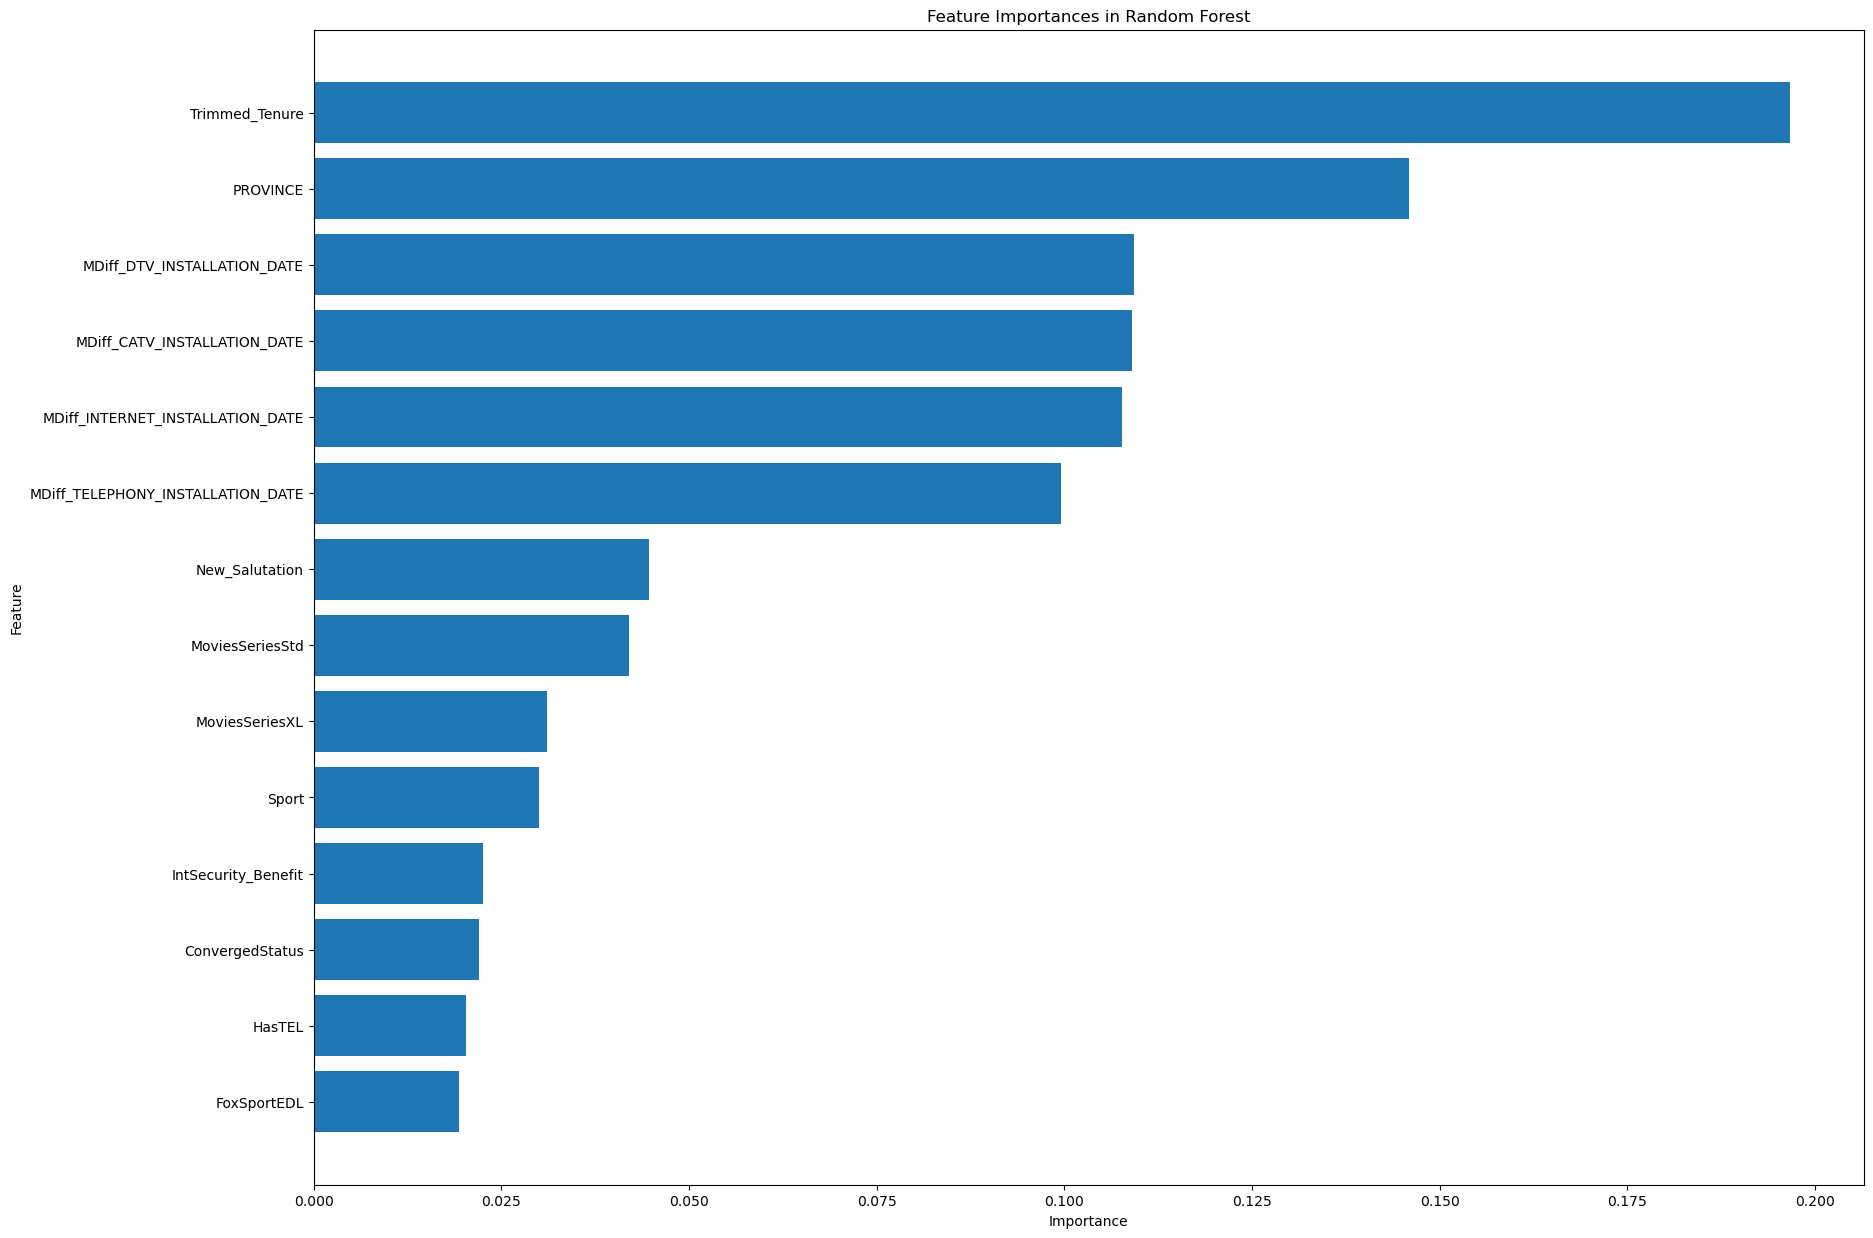

In [274]:
#feature_importances
feature_importances = rf.feature_importances_
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features= features.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 15))  
plt.barh(features['Feature'], features['Importance'])  
plt.xlabel('Importance')  
plt.ylabel('Feature')  
plt.title('Feature Importances in Random Forest')  
plt.gca().invert_yaxis()  
plt.show() # drop the last five to see if improving better

In [146]:
cm = confusion_matrix(y_test, y_pred_top)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[134  56]
 [  8 602]]


In [147]:
print(classification_report(y_test, y_pred_top))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       190
           1       0.91      0.99      0.95       610

    accuracy                           0.92       800
   macro avg       0.93      0.85      0.88       800
weighted avg       0.92      0.92      0.92       800



In [43]:
# XGBOOST
X = data
y = df-1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


xgb_model = XGBClassifier(n_estimators=1000,random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy


0.4025

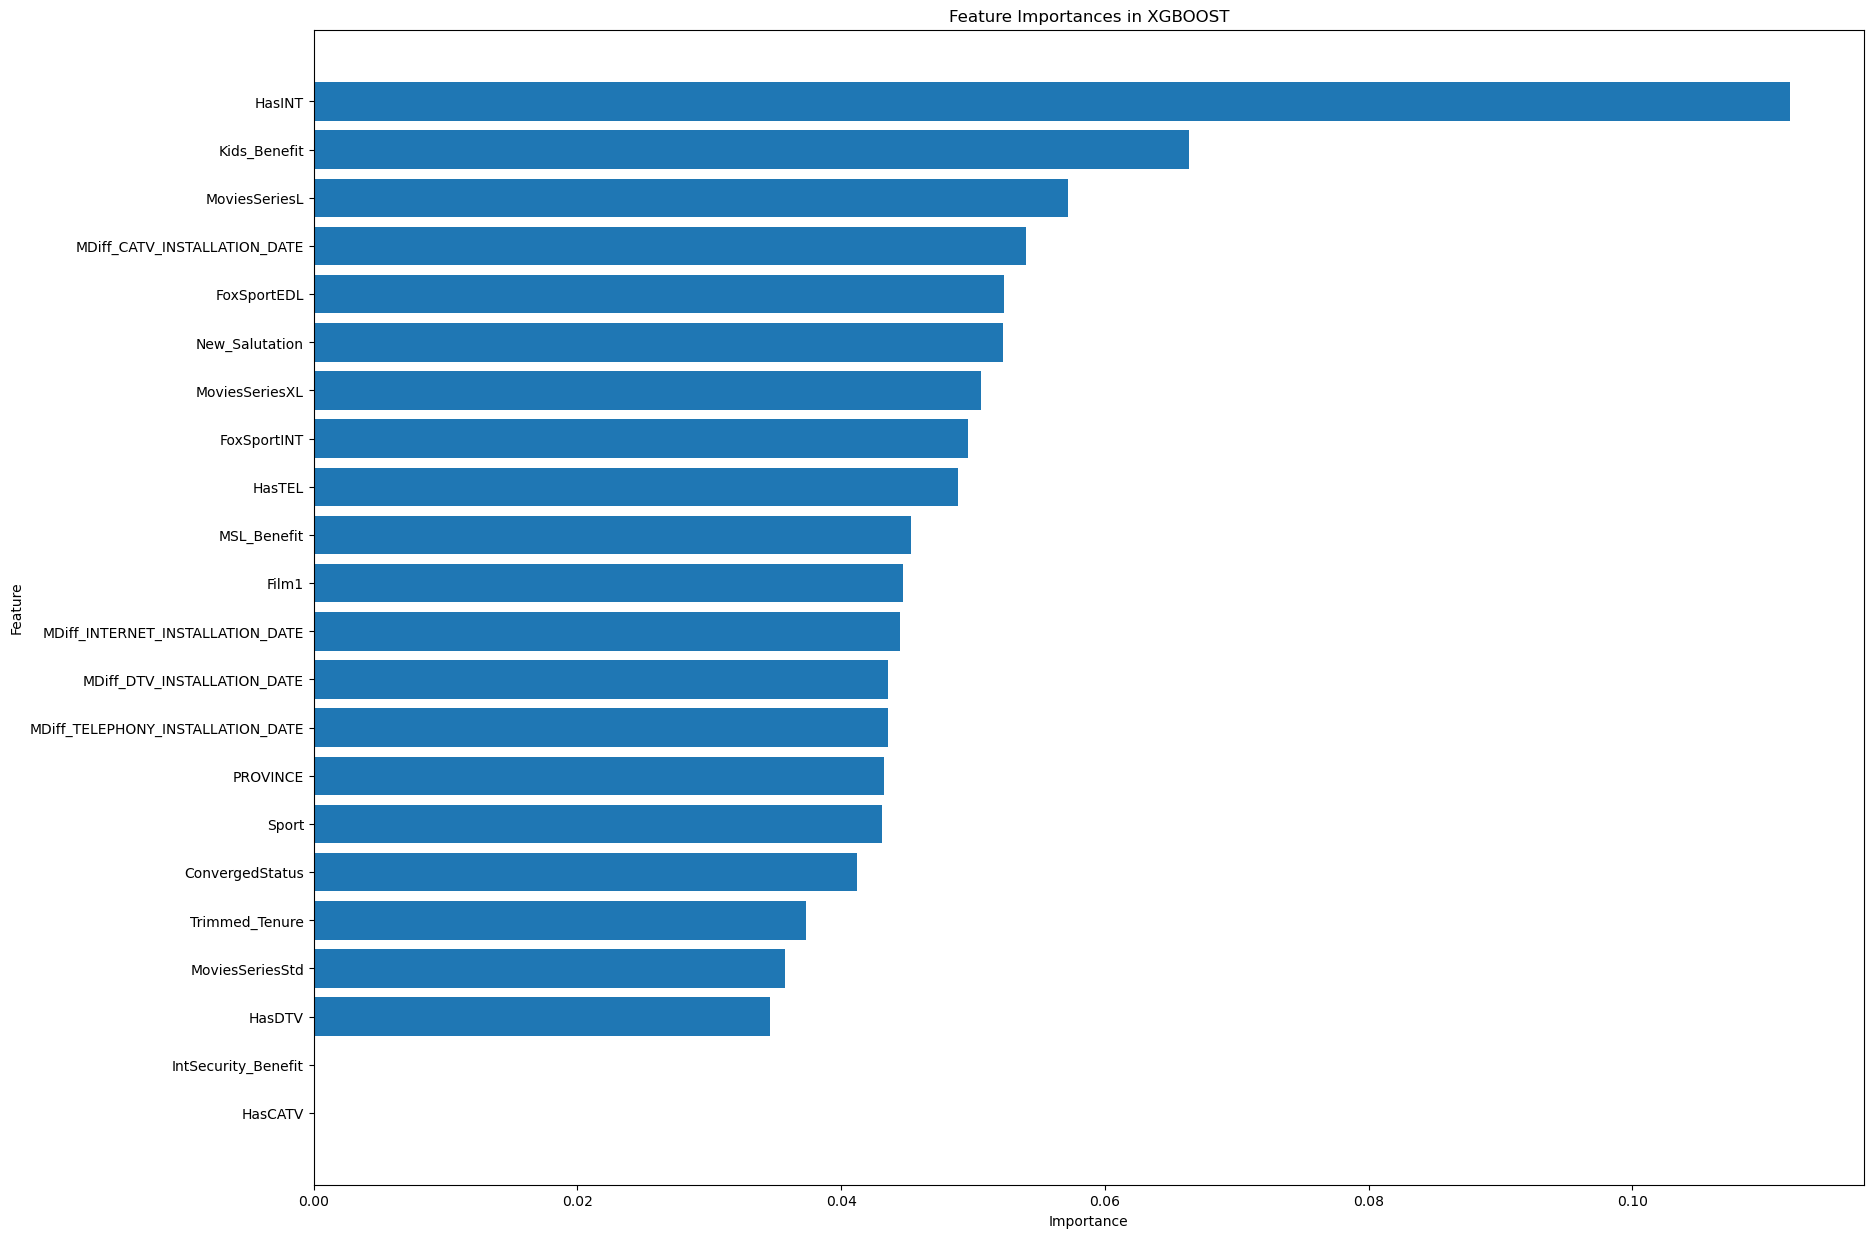

In [44]:
feature_importances = xgb_model.feature_importances_

features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features= features.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 15))  
plt.barh(features['Feature'], features['Importance'])  
plt.xlabel('Importance')  
plt.ylabel('Feature')  
plt.title('Feature Importances in XGBOOST')  
plt.gca().invert_yaxis()  
plt.show()


In [150]:
# XGBOOST top
#features=features.head(7) 
top_features = features.head(10)['Feature'].values
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

xgb_top = XGBClassifier(n_estimators=100,random_state=42)
xgb_top.fit(X_train_top, y_train)

y_pred_top = xgb_top.predict(X_test_top)
accuracy_top = accuracy_score(y_test, y_pred_top)


accuracy_top

0.91375

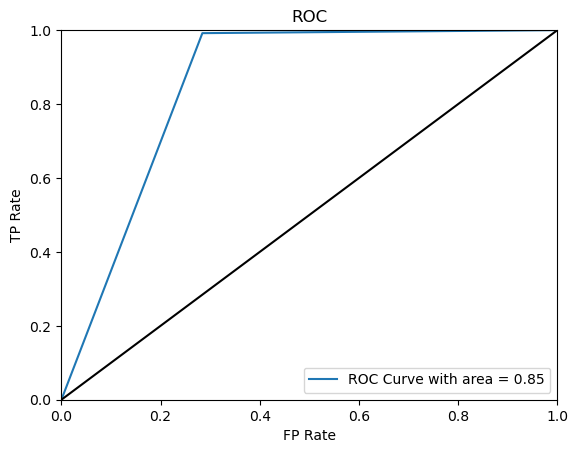

In [151]:
from sklearn.metrics import roc_curve, auc
(fpr, tpr, thresholds) = roc_curve(y_test,y_pred)

area = auc(fpr,tpr)
plt.clf() 
plt.plot(fpr,tpr,label="ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [152]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(max_iter=10000, random_state=42)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


0.9275